In [1]:
import os
import itertools
import h5py
import keras
import numpy as np
import pandas as pd
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab import drive
import joblib
from keras.layers.convolutional import Conv1D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling1D

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import drive
import joblib

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# drive.mount('/content/gdrive')

path_Algol = '/content/gdrive/MyDrive/Doktora/Truba/lcAlgol/Algol3070'
Algol_files = [os.path.join(path_Algol, f) for f in os.listdir(path_Algol) if f.endswith('.txt')]

path_Beta_Lyrae = '/content/gdrive/MyDrive/Doktora/Truba/lcBetaLyrae/BetaLyrae1070'
Beta_Lyrae_files = [os.path.join(path_Beta_Lyrae, f) for f in os.listdir(path_Beta_Lyrae) if f.endswith('.txt')]

path_W_UMa = '/content/gdrive/MyDrive/Doktora/Truba/lcWUMa/WUMa0470'
W_UMa_files = [os.path.join(path_W_UMa, f) for f in os.listdir(path_W_UMa) if f.endswith('.txt')]


In [ ]:
X = []
label = []

for file in Algol_files:
  label.append("Algol")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            x, y = line.strip().split('\t')
            #fileContent.append([float(x), float(y)])
            fileContent.append(float(y))
  X.append(fileContent)

for file in Beta_Lyrae_files:
  label.append("B Lyr")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            x, y = line.strip().split('\t')
            fileContent.append(float(y))
  X.append(fileContent)

for file in W_UMa_files:
  label.append("W UMa")
  fileContent = []
  with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            x, y = line.strip().split('\t')
            fileContent.append(float(y))
  X.append(fileContent)

In [ ]:
# Etiketleri kategorik hale getirin
encoder = LabelEncoder()
label = encoder.fit_transform(label)

X = StandardScaler().fit_transform(X)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, label).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 100
Reduced number of features: 1


In [ ]:
# Verileri eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_lda, label, test_size=0.2, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [ ]:
# Yapay sinir ağı modeli oluşturun
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Modeli derleyin
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test1, y_test1))

# Test verileri üzerinde model doğruluğunu değerlendirin
_, accuracy = model.evaluate(X_test1, y_test1, verbose=0)
print("Model accuracy: {:.2f}%".format(accuracy * 100))
joblib.dump(model, "/content/gdrive/MyDrive/Doktora/Python/NN.joblib")

Epoch 1/50
174/174 [==============================] - 2s 4ms/step - loss: 0.2807 - accuracy: 0.8840 - val_loss: 0.0273 - val_accuracy: 0.9982
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 0.9991
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9991
Epoch 

['/content/gdrive/MyDrive/Doktora/Python/NN.joblib']

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
predictions = model.predict(X_test2)

9/9 [==============================] - 0s 3ms/step


In [ ]:
print(y_test2)

[0 1 0 2 0 0 0 2 0 0 1 1 1 2 2 1 1 0 0 0 0 1 0 1 1 0 0 0 0 2 0 2 1 0 1 0 0
 1 0 0 1 0 2 0 0 2 0 2 0 0 1 0 0 0 0 2 1 1 1 2 2 1 1 0 0 1 2 2 2 1 2 1 0 0
 0 0 1 0 2 2 0 0 0 0 1 0 1 2 2 1 0 1 1 1 2 0 1 0 2 1 0 2 2 2 0 0 2 1 1 2 2
 0 0 0 1 2 1 2 2 0 0 1 2 2 0 0 1 0 0 0 0 2 0 2 2 2 1 0 1 1 1 0 0 1 2 1 2 2
 0 0 2 2 1 1 1 2 0 1 1 1 2 1 1 2 0 1 1 0 0 1 1 0 1 2 0 0 2 0 0 0 1 1 1 0 0
 2 2 2 1 0 2 0 1 1 0 0 0 0 1 0 2 2 2 1 2 0 1 2 0 1 2 1 2 2 2 1 1 2 1 1 0 0
 0 1 1 1 0 2 0 0 1 0 0 0 1 1 0 0 0 2 2 1 1 1 1 0 0 1 2 2 0 2 1 2 2 2 2 2 2
 1 1 1 2 0 1 2 1 2 1 1 0 0 0 1 1 1 0 1]


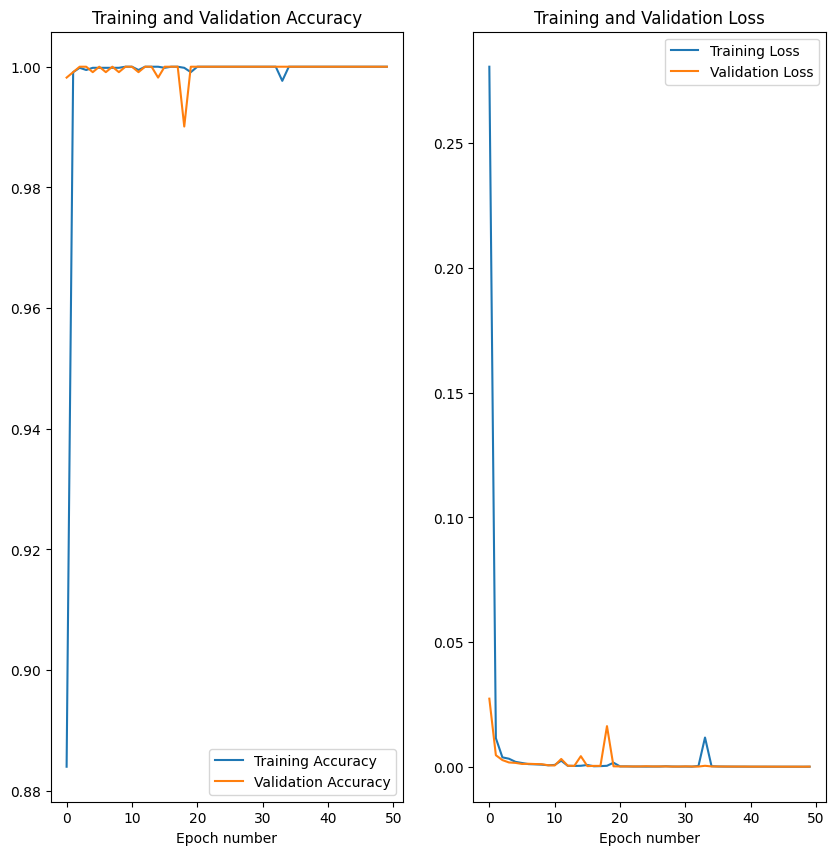

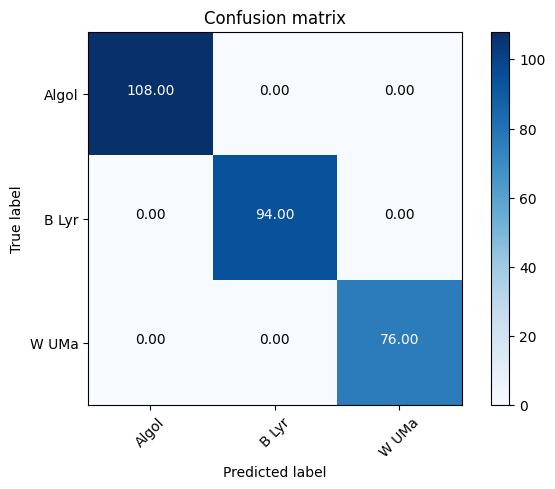

In [ ]:
# Training ve validation grafiği
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(50), history.history["accuracy"], label='Training Accuracy')
plt.plot(range(50), history.history["val_accuracy"], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch number")
plt.subplot(1, 2, 2)
plt.plot(range(50), history.history["loss"], label='Training Loss')
plt.plot(range(50), history.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch number")
plt.show()

confusion_matrix = confusion_matrix(y_test2, pd.DataFrame(predictions).idxmax(axis=1))
class_names = ['Algol', 'B Lyr', 'W UMa']
# Confusion matrix grafiği
plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], ".2f"), horizontalalignment="center", color="white" if confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

file1 = '/content/gdrive/MyDrive/Doktora/Python/Algol_test/algol1203.txt'
file2 = '/content/gdrive/MyDrive/Doktora/Python/Algol_test/algol1202.txt'
file3 = '/content/gdrive/MyDrive/Doktora/Python/Beta_Lyrae_test/beta_lyrae1603.txt'
file4 = '/content/gdrive/MyDrive/Doktora/Python/Beta_Lyrae_test/beta_lyrae1602.txt'
file5 = '/content/gdrive/MyDrive/Doktora/Python/W_UMa_test/w_uma1623.txt'
file6 = '/content/gdrive/MyDrive/Doktora/Python/W_UMa_test/w_uma1622.txt'

data_test = []
label = []
fileContent = []
  
with open(file3, 'r') as f:
    label.append("Algol")
    lines = f.readlines()
    for line in lines:
      # Satırları ayrıştırın ve x, y koordinatlarını depolayın
      x, y = line.strip().split('\t')
      fileContent.append(float(y))

data_test.append(fileContent)

data_test = StandardScaler().fit_transform(data_test)
#data_test = lda.fit(data_test, label).transform(data_test)

#data_test = np.array(data_test)

loadedModel = joblib.load("/content/gdrive/MyDrive/Doktora/Python/NN.joblib")

model.predict(data_test)

InvalidArgumentError: ignored